<a href="https://colab.research.google.com/github/jatinscodingproject/Future-prediction-of-bitcoin/blob/main/cryptocurrency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.svm import SVR
plt.style.use('fivethirtyeight')

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf

In [ ]:
df = yf.download('BTC-USD')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2022-08-04,22848.214844,23198.009766,22485.701172,22630.957031,22630.957031,25120229769
2022-08-05,22626.833984,23422.828125,22612.177734,23289.314453,23289.314453,28881249043
2022-08-06,23291.423828,23326.562500,22961.279297,22961.279297,22961.279297,15978259885


In [ ]:
future_days = 5

In [ ]:
# create a new column
df[str(future_days)+'_Days_Price_Forecast'] = df[['Close']].shift(-future_days)
#show the data
df[['Close', str(future_days)+'_Days_Price_Forecast']]

,Close,5_Days_Price_Forecast
Date,,
2014-09-17,457.334015,402.152008
2014-09-18,424.440002,435.790985
2014-09-19,394.795990,423.204987
2014-09-20,408.903992,411.574005
2014-09-21,398.821014,404.424988
...,...,...
2022-08-04,22630.957031,NaN
2022-08-05,23289.314453,NaN
2022-08-06,22961.279297,NaN


In [ ]:
X= np.array(df['Close'])
X= X[:df.shape[0] - future_days]
print(X)

[  457.33401489   424.44000244   394.79598999 ... 23314.19921875
 22978.1171875  22846.5078125 ]


In [ ]:
y =np.array(df[str(future_days)+'_Days_Price_Forecast'])
y =y[:-future_days]
print(y)

[  402.15200806   435.79098511   423.20498657 ... 22961.27929688
 23175.890625   23389.07617188]


In [ ]:
# split the data
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test , y_train, y_test =train_test_split(X,y,test_size = 0.2)

In [ ]:
x_train= x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [ ]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3 , gamma =0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=1e-05)

In [ ]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy:' , svr_rbf_confidence)

svr_rbf accuracy: 0.7513167641398014


In [ ]:
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

[  363.94928      428.95054654  9336.6938909    661.65648933
   373.98885562 20837.97283942 29403.82113006 11638.0630783
   456.72379056 10821.83321358   273.76861117 23105.0690125
 29664.52104495  2710.29399768 26815.90297598 25186.87490067
  4285.51045372  1166.41355911 34524.90527405 11561.79423388
 11503.53069402  9788.80342095  9648.53306536  6902.37154379
 20046.5449113  25885.32553888  6169.31019481   458.76402295
   351.29359256   264.60588179   561.14285798  8556.65404197
  6479.56183944  9300.43894405 37487.16103703   422.59969761
   222.54528652   428.83196268 10509.24235332  7112.60592171
  3958.63474447   255.24513428 22506.34101325  5904.93746888
 10295.78550247 23002.27667821 27757.54734115   252.72319914
   562.86523735  2755.75559169  7455.98111864  9789.38779911
 10299.10288485  3769.67019128  7655.70911694   286.21624457
 30511.33713423   429.24731932  6555.26042533  8268.02318204
  9244.21920285   603.03311896   446.53214175 10337.51003656
 12108.19904568   691.0231

In [ ]:
print(y_test)


[  379.24499512   410.44400024  9677.11328125   663.25500488
   311.08401489 20190.11523438 47062.6640625  10005.
   450.3039856  10668.96875      231.49299622 20280.63476562
 42358.80859375  2589.60009766 46456.05859375 46188.453125
  3625.04003906  1175.94995117 50822.1953125  11758.28320312
 11862.93652344  8784.49414062 10599.10546875  6162.47998047
 14973.29980469 61572.7890625   5829.50146484   459.60299683
   415.56298828   263.4750061    586.75299072  5563.70703125
  6791.12939453  9164.23144531 46717.578125     416.39401245
   285.82901001   437.74798584 11478.16894531  6218.29980469
  3854.35791016   228.57299805 22961.27929688  5402.69726562
 10400.91503906 19269.3671875  28360.81054688   275.67001343
   685.559021    3213.93994141  7410.65673828 10518.17480469
 11403.70019531  3629.78759766  6753.12011719   223.41200256
 51093.65234375   424.02999878  5289.77099609  8000.32958984
  9360.87988281   610.20397949   382.29901123 10916.05371094
 15455.40039062   661.28497314   2

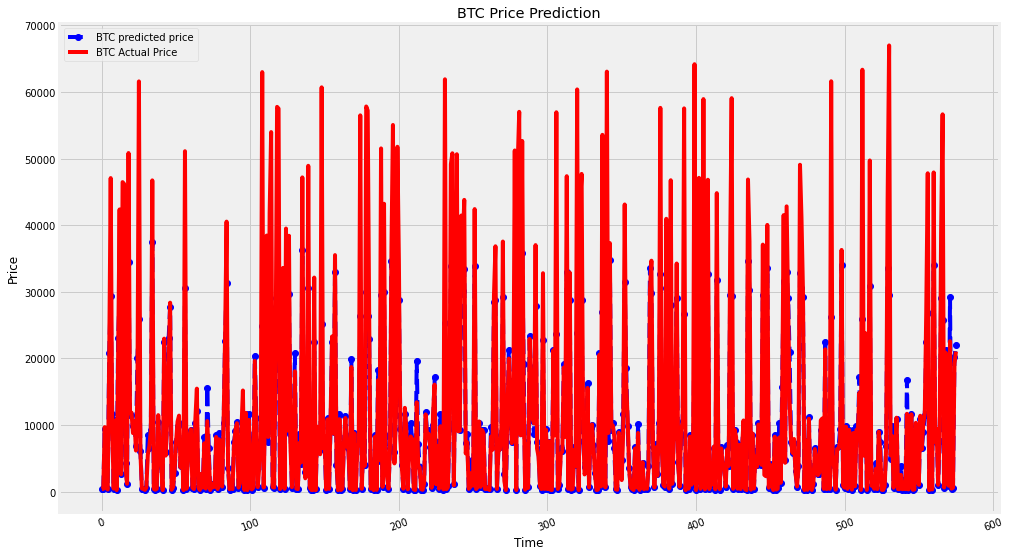

In [ ]:
plt.figure(figsize=(15,9))
plt.grid(True)
plt.plot(svm_prediction, color = 'blue', marker= 'o', linestyle='dashed', label='BTC predicted price')
plt.plot(y_test, color = 'red', label ='BTC Actual Price')

plt.title('BTC Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=20)
plt.show()

In [ ]:
df.tail(7)

,Open,High,Low,Close,Adj Close,Volume,5_Days_Price_Forecast
Date,,,,,,,
2022-08-02,23308.433594,23415.041016,22710.083984,22978.117188,22978.117188,28389250717,23175.890625
2022-08-03,22981.302734,23578.650391,22747.835938,22846.507812,22846.507812,26288169966,23389.076172
2022-08-04,22848.214844,23198.009766,22485.701172,22630.957031,22630.957031,25120229769,NaN
2022-08-05,22626.833984,23422.828125,22612.177734,23289.314453,23289.314453,28881249043,NaN
2022-08-06,23291.423828,23326.562500,22961.279297,22961.279297,22961.279297,15978259885,NaN
2022-08-07,22963.505859,23359.009766,22894.556641,23175.890625,23175.890625,15886817043,NaN
2022-08-08,23176.546875,23401.982422,23176.546875,23389.076172,23389.076172,16340702208,NaN
